In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

In [73]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [74]:
api.dataset_download_file('jackogozaly/data-science-and-stem-salaries','Levels_Fyi_Salary_Data.csv')

False

In [75]:
df1 = pd.read_csv('Levels_Fyi_Salary_Data.csv.zip')

In [76]:
#The data is made up of 62642 rows and 29 columns
df1.shape

(62642, 29)

In [77]:
#Exploring datatypes
df1.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [78]:
#Listing the columns
df1.head(4)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [79]:
#Choosing the columns we need
df1 = df1[['timestamp','gender', 'company', 'title', 'totalyearlycompensation','location', 'yearsofexperience', 'Race','Education']]

In [80]:
#Calculating Null values
count_null = pd.DataFrame(df1.isna().sum(), columns = ['Null Values'])
count_null

,Null Values
timestamp,0
gender,19540
company,5
title,0
totalyearlycompensation,0
location,0
yearsofexperience,0
Race,40215
Education,32272


In [81]:
#Dropping not a number values
df1 = df1.dropna()

In [82]:
#Cheking if data is clean
count_null = pd.DataFrame(df1.isnull().sum(), columns = ['Null Values'])
count_null

,Null Values
timestamp,0
gender,0
company,0
title,0
totalyearlycompensation,0
location,0
yearsofexperience,0
Race,0
Education,0


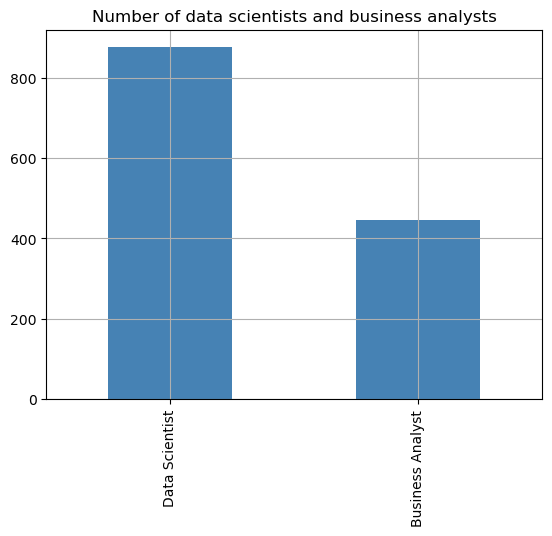

In [83]:
#Choosing data science and business analyst jobs
undesired_titles = ['Software Engineer', 'Product Manager', 'Software Engineering Manager', 'Hardware Engineer', 'Product Designer', 'Technical Program Manager', 'Solution Architect', 'Management Consultant', 'Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df1_orginal = df1.copy()
df1 = df1[df1['title'].apply(lambda x: x not in undesired_titles)]
bar = df1.title.value_counts().plot.bar(color='steelblue')
plt.title('Number of data scientists and business analysts', size=12)
plt.grid(True)


In [84]:
#Cleaning years of experience table
df1= df1[df1['yearsofexperience'] != 0]
df1 = df1[df1['gender'] != 'Other']

Text(0.5, 1.0, 'Distribution of total yearly compensation')

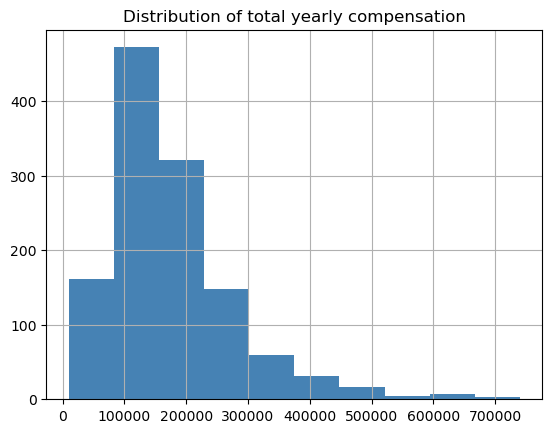

In [85]:
#Checking the distribution of the total compensation for our roles
df1['totalyearlycompensation'].hist(color='steelblue')
plt.title("Distribution of total yearly compensation")

<AxesSubplot:>

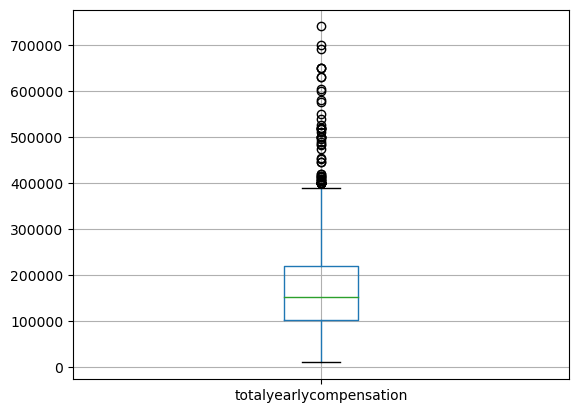

In [86]:
df1.boxplot(column = 'totalyearlycompensation')

In [87]:
#Converting timestamp to date format
df1['date'] = pd.to_datetime(df1.timestamp)

In [88]:
#Removing time from date
df1['new_date'] = [d.date() for d in df1['date']]

In [89]:
#All columns in lower case
df1.columns= df1.columns.str.lower()

In [90]:
#Splitting location column
df1[['city', 'state', 'country']] = df1['location'].str.split(',', expand=True)
df1.country.fillna('United States',inplace=True)
df1.head(2)

,timestamp,gender,company,title,totalyearlycompensation,location,yearsofexperience,race,education,date,new_date,city,state,country
23679,7/6/2020 17:16:12,Male,Google,Data Scientist,170000,"San Francisco, CA",3.0,White,Bachelor's Degree,2020-07-06 17:16:12,2020-07-06,San Francisco,CA,United States
23699,7/6/2020 22:10:39,Male,Microsoft,Data Scientist,220000,"Bellevue, WA",4.0,White,PhD,2020-07-06 22:10:39,2020-07-06,Bellevue,WA,United States


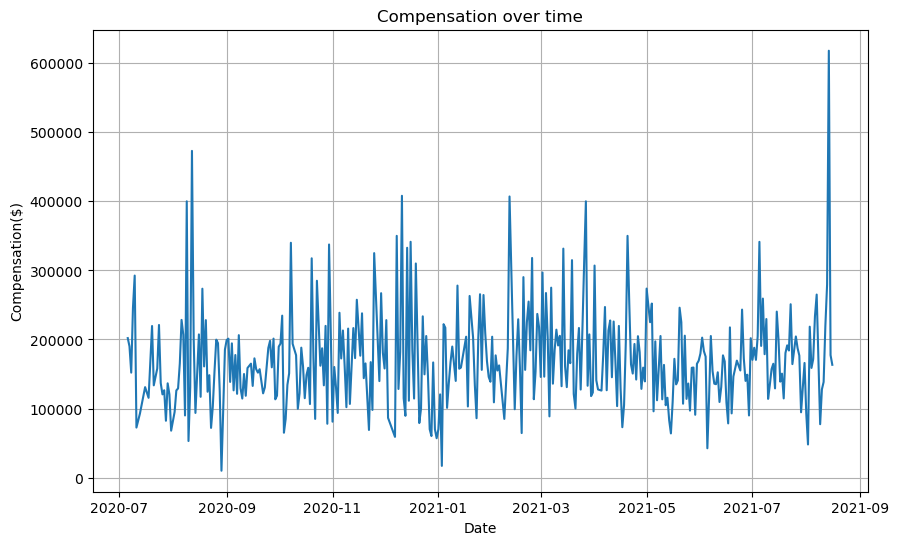

In [91]:
#Checking the analyzing period and salaries variation
df1.groupby('new_date').mean()['totalyearlycompensation'].plot(kind="line", figsize=(10,6))
plt.title("Compensation over time")
plt.ylabel("Compensation($)")
plt.xlabel("Date")

plt.grid(True)

In [133]:
#Analyzing global market of Data Scientists and Business Analysts
df2 = df1.groupby(['country']).mean().reset_index()
df3 = df2[['country','totalyearlycompensation']].sort_values('totalyearlycompensation', ascending = False)
df3.head(2)

,country,totalyearlycompensation
28,United States,192405.594406
12,Israel,188833.333333


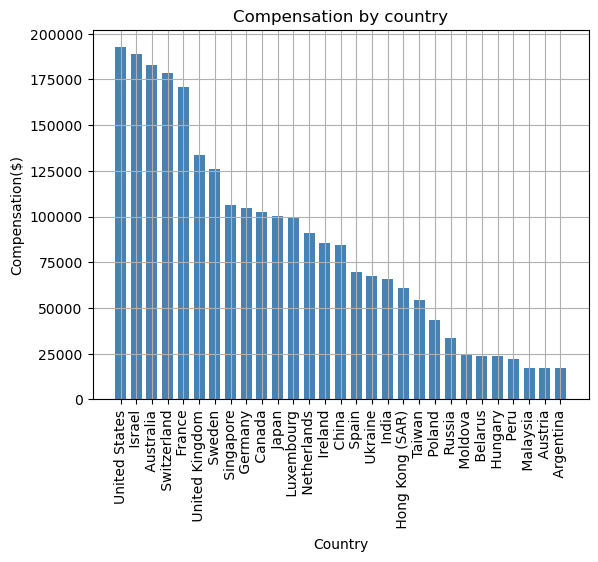

In [134]:
plt.bar(df3['country'], df3['totalyearlycompensation'], color ='steelblue',
        width = 0.7)
plt.title('Compensation by country', size=12)
plt.xticks(rotation=90)
plt.xlabel('Country', size = 10)
plt.ylabel('Compensation($)', size = 10)
plt.grid(True)
plt.show()

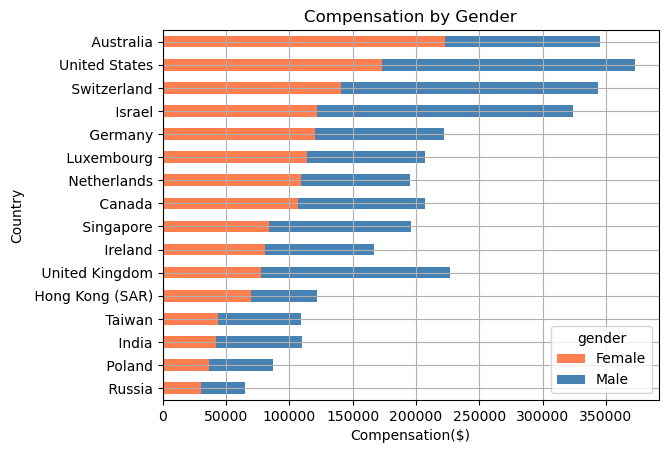

In [94]:
#trend for female and male
by_male = df1.pivot_table('totalyearlycompensation', 
                         index = 'country',
                         columns = 'gender',
                        aggfunc='mean')
by_male = by_male.dropna()
by_male = by_male.sort_values(by=['Female'])
by_male.plot(kind='barh', stacked=True, color=['coral','steelblue'])
plt.title('Compensation by Gender', size=12)
plt.xlabel('Compensation($)', size = 10)
plt.ylabel('Country', size = 10)
plt.grid(True)
plt.show()

In [95]:
df1['Data Scientist'] = np.where(df1['title']=='Data Scientist',1,0)
df1['Business Analyst'] = np.where(df1['title']=='Business Analyst',1,0)

In [96]:
titles = df1.groupby(['country']).sum()
titles = titles[['Data Scientist', 'Business Analyst']]
titles.head(2)

,Data Scientist,Business Analyst
country,,
Argentina,0,1
Australia,2,3


In [97]:
df4=pd.merge(df3,titles, on=['country','country'])
df4 = df4.sort_values('totalyearlycompensation', ascending = False)
df4.head(2)

,country,totalyearlycompensation,Data Scientist,Business Analyst
0,United States,192405.594406,662,339
1,Israel,188833.333333,6,0


<AxesSubplot:title={'center':'Data Scientists'}, ylabel='Professionals'>

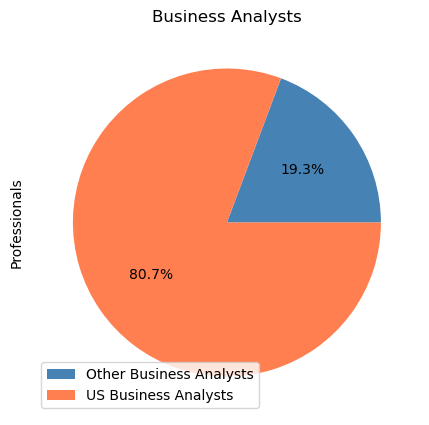

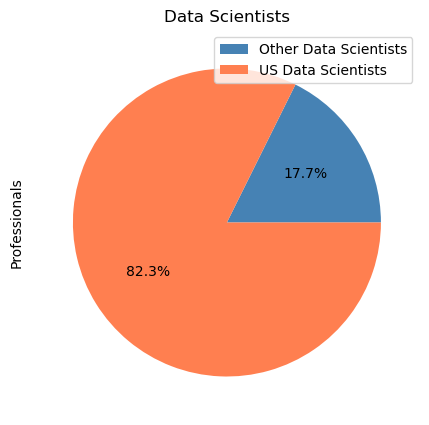

In [98]:
#Describing our Dataset- Mostly US based Business Analysts and Data Scientists included in our Dataset 
Non_US_DS = df4.loc[df4['country'] != "United States", 'Data Scientist'].sum()
Non_US_BA = df4.loc[df4['country'] != "United States", 'Business Analyst'].sum()
US_BA = df4.loc[df4['country'] == "United States", 'Business Analyst'].values[0]
US_DA = df4.loc[df4['country'] == "United States", 'Data Scientist'].values[0]
BA_Data = [['Other Business Analysts',Non_US_BA],['US Business Analysts',US_BA]]
DS_Data = [['Other Data Scientists',Non_US_DS],['US Data Scientists',US_DA]]
dfp1 = pd.DataFrame(BA_Data, columns=['Title','Professionals'])
dfp2 = pd.DataFrame(DS_Data, columns=['Title','Professionals'])
dfp1.groupby(['Title']).sum().plot(kind='pie', y='Professionals',autopct='%1.1f%%', colors=['steelblue','coral'], labels=None, title= 'Business Analysts', figsize = (7,5))
dfp2.groupby(['Title']).sum().plot(kind='pie', y='Professionals',autopct='%1.1f%%',colors=['steelblue','coral'], labels=None, title= 'Data Scientists', figsize = (7,5))

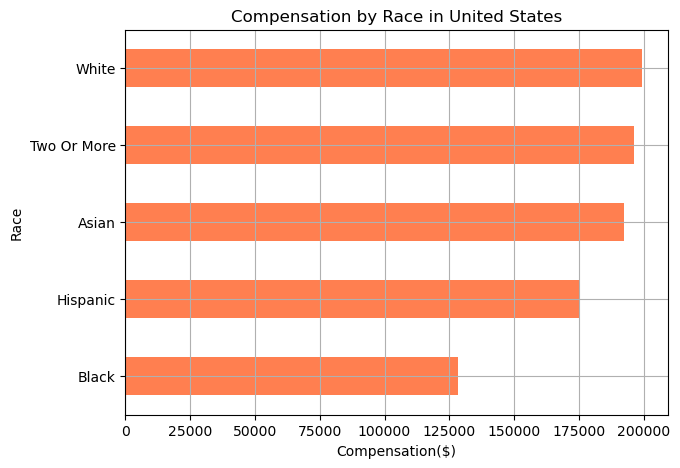

In [99]:
#Since most of the data coming from United States we can analyze compensation by race in th US
United_States = df1[df1['country'].str.startswith('United')]
United_States.groupby('race').mean()['totalyearlycompensation'].sort_values().plot.barh(color='coral', figsize = (7,5))
plt.title('Compensation by Race in United States', size=12)
plt.xlabel('Compensation($)', size = 10)
plt.ylabel('Race', size = 10)
plt.grid(True)

In [100]:
#Describing education level for Data Scientist and Business Analyst
df1['education'].unique()
df1['education'].value_counts()

Master's Degree      627
Bachelor's Degree    410
PhD                  181
Some College           4
Highschool             2
Name: education, dtype: int64

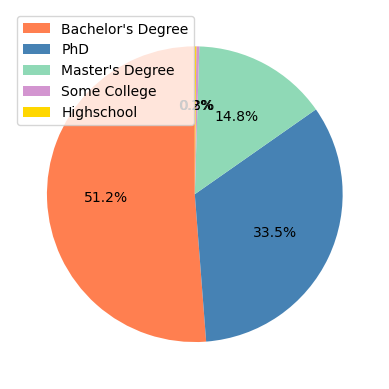

In [101]:
colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold']
plt.pie(df1['education'].value_counts(), startangle=90, autopct='%1.1f%%', colors=colors)
plt.legend(df1['education'].unique())
plt.show()

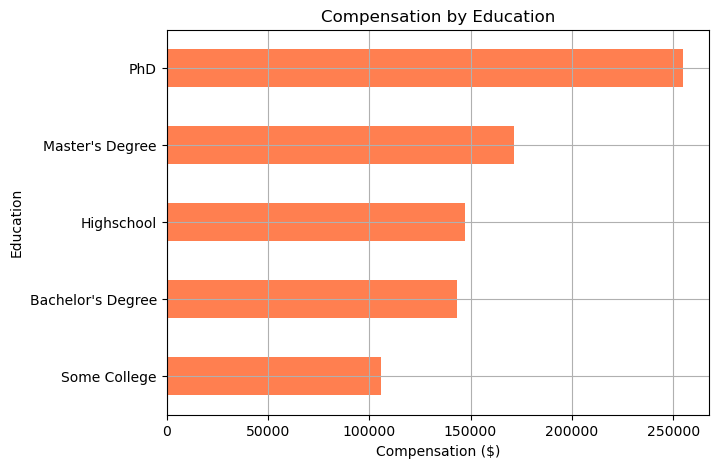

In [102]:
pay_by_education = df1[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title('Compensation by Education', size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('Education', size = 10)
plt.grid(True)
plt.show()

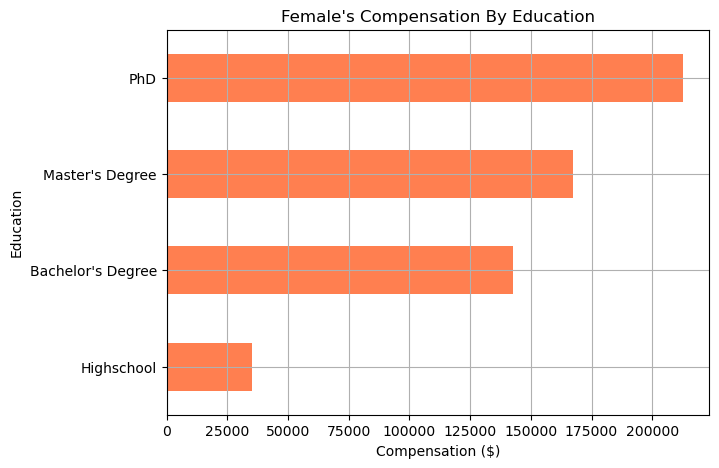

In [103]:
#Female's Salary by Education
female_df = df1[df1["gender"] == "Female"]
female_education_salary = female_df[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title("Female's Compensation By Education", size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('Education', size = 10)
plt.grid(True)
plt.show()

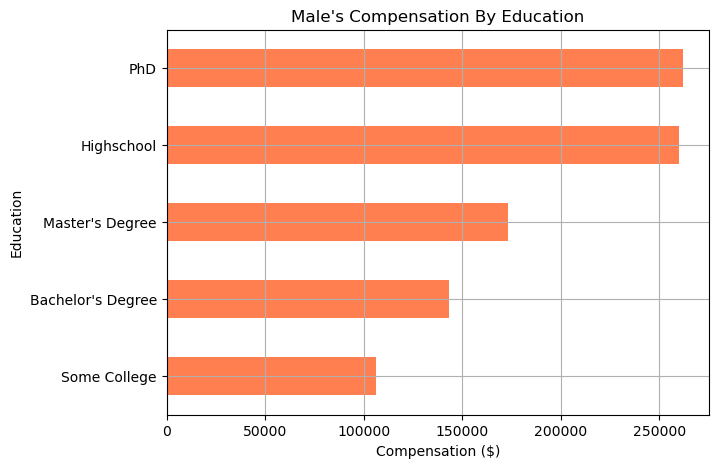

In [104]:
#Male's Salary by Education
male_df = df1[df1["gender"] == "Male"]
male_education_salary = male_df[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title("Male's Compensation By Education", size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('Education', size = 10)
plt.grid(True)
plt.show()

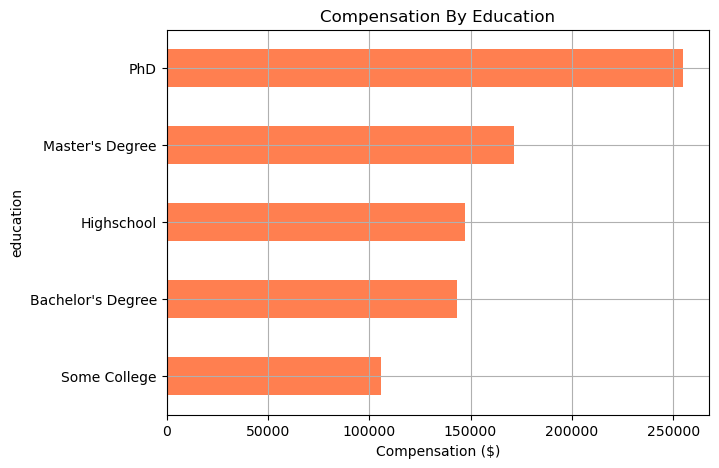

In [105]:
#Salary by Education
pay_by_education = df1[['totalyearlycompensation','education']].groupby(['education']).mean().round()\
.sort_values('totalyearlycompensation', ascending = True).plot.barh(figsize = (7,5), legend = False, color='coral')
plt.title('Compensation By Education', size = 12)
plt.xlabel('Compensation ($)', size = 10)
plt.ylabel('education', size = 10)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Compensation by Education')

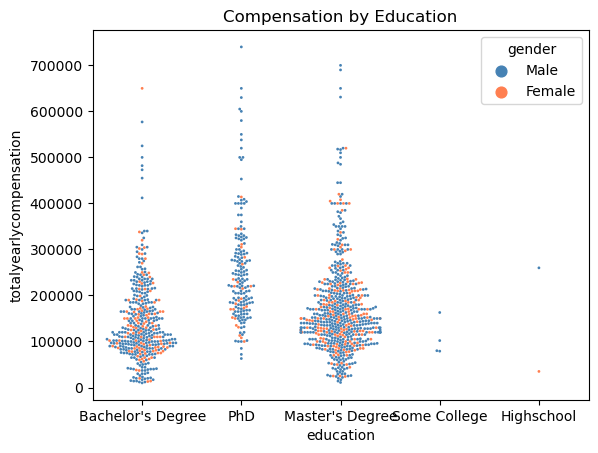

In [106]:
#Compensation by Education with distribution
ax2 = sns.swarmplot(x= 'education', y ='totalyearlycompensation', data=df1, hue ='gender', size =2, palette=dict(Male = 'steelblue', Female = 'coral'))
ax2.set_title('Compensation by Education')

Analyzing gender by compensation

In [107]:
#Creating dataset with females only
female_df = df1[df1["gender"] == "Female"]

In [108]:
#Number of females working as DS and BA
female_jobs = female_df.pivot_table('gender', 
                         columns = 'title',
                        aggfunc='count')
female_jobs

title,Business Analyst,Data Scientist
gender,134,178


In [109]:
#Creating dataset with males only
male_df = df1[df1["gender"] == "Male"]

In [110]:
#Number of males working as DS and BA
male_jobs = male_df.pivot_table('gender', 
                         columns = 'title',
                        aggfunc='count')
male_jobs

title,Business Analyst,Data Scientist
gender,286,626


In [111]:
#Selecting the columns that are needed for the analysis
female_df = female_df[['gender', 'company', 'title', 'totalyearlycompensation', 'yearsofexperience',]]
female_df.head(2)

,gender,company,title,totalyearlycompensation,yearsofexperience
23764,Female,Expedia,Data Scientist,131000,1.0
23789,Female,PayPal,Data Scientist,297000,13.0


<AxesSubplot:ylabel='% of Female Professionals'>

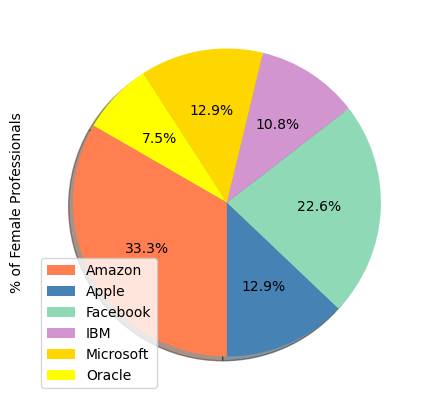

In [112]:
#Average female salary by company
female_city_count = female_df.groupby("company").count()['gender'].reset_index()
female_city_count = female_city_count[female_city_count['gender'] > 5]
female_city_count = female_city_count.set_index(['company'])
female_city_count = female_city_count.rename(columns={"gender": "% of Female Professionals"})
female_city_count.plot(kind='pie', y = '% of Female Professionals', autopct='%1.1f%%',labels=None, shadow=True, startangle=150, figsize = (7,5), colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold', 'yellow','lightsalmon'])

<AxesSubplot:ylabel='% of Male Professionals'>

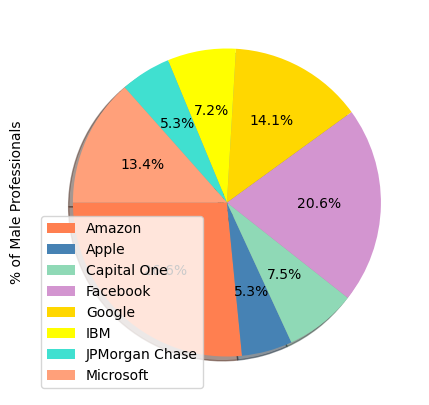

In [113]:
#average male salary by company
male_city_count = male_df.groupby("company").count()['gender'].reset_index()
male_city_count = male_city_count[male_city_count['gender'] > 15]
male_city_count = male_city_count.set_index(['company'])
male_city_count = male_city_count.rename(columns={"gender": "% of Male Professionals"})
male_city_count.plot(kind='pie', y = '% of Male Professionals', autopct='%1.1f%%',labels=None, title= '', shadow=True, startangle=180, figsize = (7,5), colors = ['coral', 'steelblue', '#8fd9b6', '#d395d0','gold', 'yellow', 'turquoise','lightsalmon'])

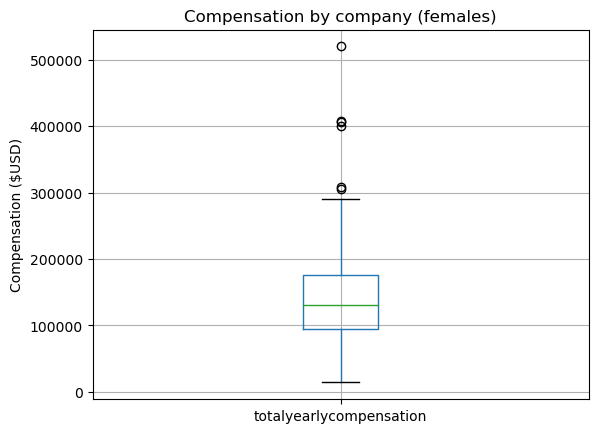

Summary Statistics


,totalyearlycompensation
count,146.000000
mean,144545.907245
std,77479.064871
min,14000.000000
25%,95250.000000
50%,131250.000000
75%,175750.000000
max,520000.000000


In [114]:
#average salary for females per company
female_company_salary = female_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
x_labels = ["Female compensation $"]
fig, ax = plt.subplots()
female_company_salary.boxplot(column = 'totalyearlycompensation', labels=x_labels)
ax.set_title('Compensation by company (females)')
ax.set_ylabel('Compensation ($USD)')
ax.grid(True)
plt.show()
print("Summary Statistics")
female_company_salary.describe()

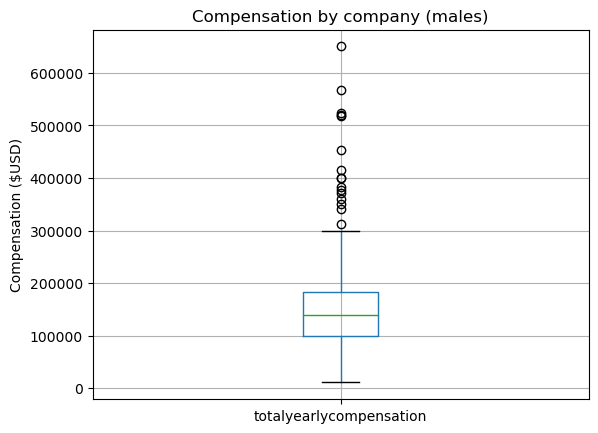

Summary Statistics


,totalyearlycompensation
count,275.000000
mean,155443.779037
std,93421.769665
min,11000.000000
25%,98500.000000
50%,138500.000000
75%,183500.000000
max,650000.000000


In [115]:
#average salary for males per company
male_company_salary = male_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
x_labels = ["Male compensation by company $"]
fig, ax = plt.subplots()
male_company_salary.boxplot(column = 'totalyearlycompensation', labels=x_labels)
ax.set_title('Compensation by company (males)')
ax.set_ylabel('Compensation ($USD)')
ax.grid(True)
plt.show()
print("Summary Statistics")
male_company_salary.describe()

In [116]:
male_company_salary = male_df.groupby("company").mean()['totalyearlycompensation']
male_company_experience = male_df.groupby("company").mean()['yearsofexperience']

In [117]:
female_company_experience = female_df.groupby("company").mean()['yearsofexperience']
female_company_salary = female_df.groupby("company").mean()['totalyearlycompensation']

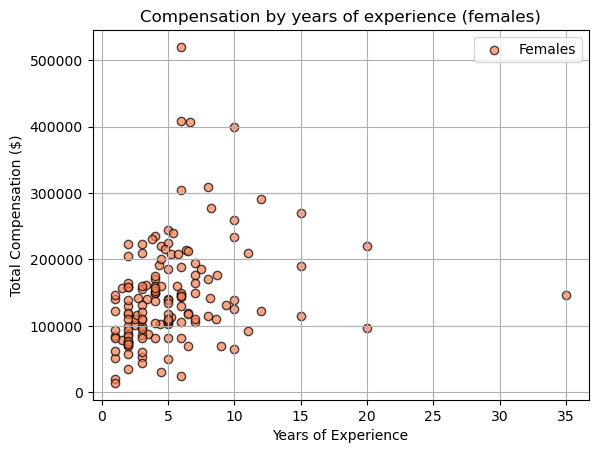

In [118]:
#Female compensation by years of experience
plt.scatter(female_company_experience,
         female_company_salary,
           c="coral",
          edgecolor="black", linewidths=1,
          alpha=0.7, label="Females")
plt.title("Compensation by years of experience (females)")
plt.ylabel("Total Compensation ($)")
plt.xlabel("Years of Experience")
plt.grid(True)
plt.legend()

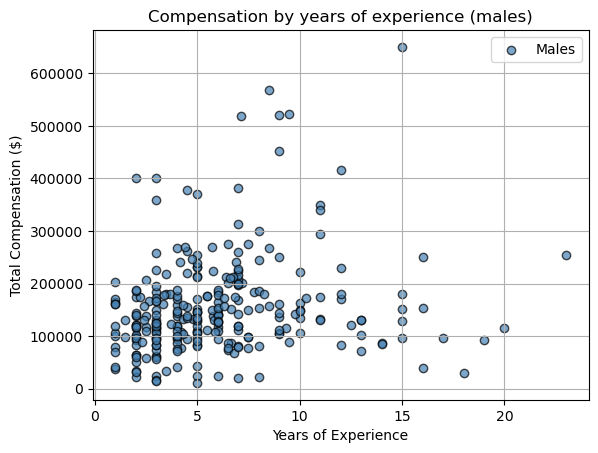

In [119]:
#Male compensation by years of experience
plt.scatter(male_company_experience,
         male_company_salary,
           c="steelblue",
          edgecolor="black", linewidths=1,
          alpha=0.7, label="Males")
plt.title("Compensation by years of experience (males)")
plt.ylabel("Total Compensation ($)")
plt.xlabel("Years of Experience")
plt.grid(True)
plt.legend()

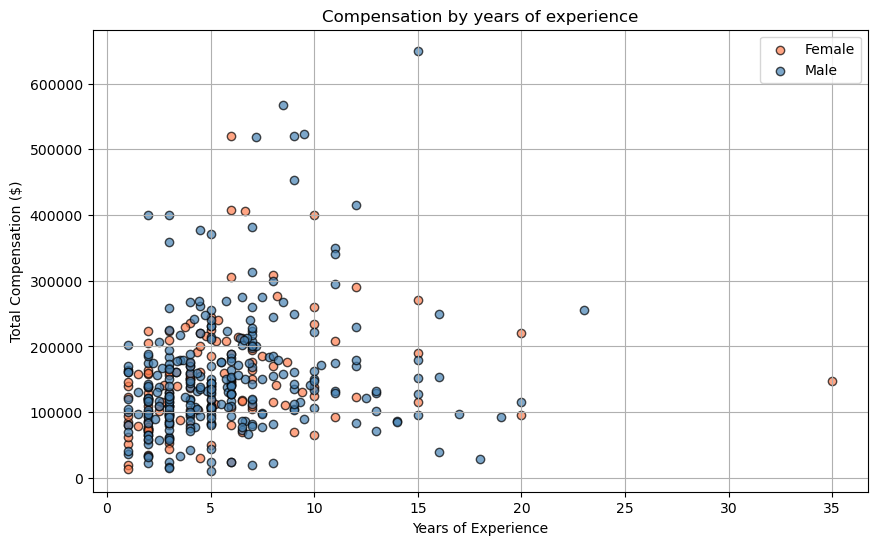

In [120]:
plt.subplots(figsize=(10, 6))
plt.scatter(female_company_experience,
         female_company_salary,
           c="coral",
          edgecolor="black", linewidths=1,
          alpha=0.7, label="Female")
plt.scatter(male_company_experience,
         male_company_salary,
           c="steelblue",
          edgecolor="black", linewidths=1,
          alpha=0.7, label="Male")
plt.title("Compensation by years of experience")
plt.ylabel("Total Compensation ($)")
plt.xlabel("Years of Experience")
plt.grid(True)
plt.legend()


In [121]:
female_company_salary = female_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
female_salary = female_company_salary[['totalyearlycompensation']]

female_company_experience = female_df.groupby("company").mean()['yearsofexperience'].reset_index()
female_experience = female_company_experience[['yearsofexperience']]

In [122]:
x = female_experience.iloc[:, 0].values.reshape(-1,1)
y = female_salary.iloc[:, 0].values.reshape(-1,1)

In [123]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [124]:
y_pred = lr.predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

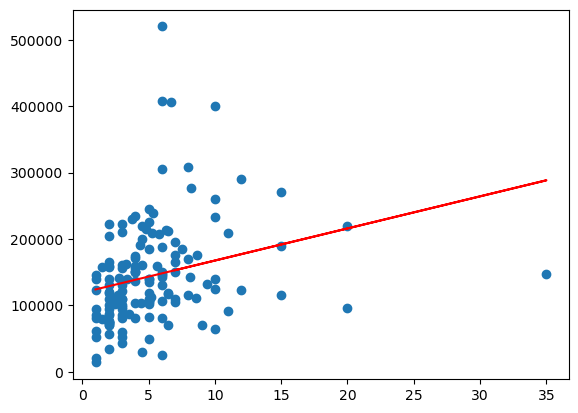

In [125]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red', label = 'regression line')
plt.show

In [126]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     10.93
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00119
Time:                        17:02:04   Log-Likelihood:                -1845.0
No. Observations:                 146   AIC:                             3694.
Df Residuals:                     144   BIC:                             3700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.192e+05   9871.264     12.071      0.0

In [127]:
male_company_salary = male_df.groupby("company").mean()['totalyearlycompensation'].reset_index()
male_salary = male_company_salary[['totalyearlycompensation']]

male_company_experience = male_df.groupby("company").mean()['yearsofexperience'].reset_index()
male_experience = male_company_experience[['yearsofexperience']]

In [128]:
x1 = male_experience.iloc[:, 0].values.reshape(-1,1)
y1 = male_salary.iloc[:, 0].values.reshape(-1,1)

In [129]:
lr = LinearRegression()
lr.fit(x1,y1)

LinearRegression()

In [130]:
y_pred1 = lr.predict(x1)

<function matplotlib.pyplot.show(close=None, block=None)>

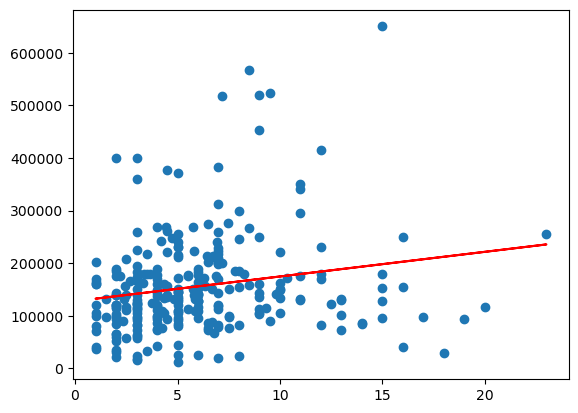

In [131]:
plt.scatter(x1,y1)
plt.plot(x1, y_pred1, color='red', label = 'regression line')
plt.show

In [132]:
x1 = sm.add_constant(x1)

model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.36
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00145
Time:                        17:02:04   Log-Likelihood:                -3531.9
No. Observations:                 275   AIC:                             7068.
Df Residuals:                     273   BIC:                             7075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.277e+05   1.03e+04     12.441      0.0